In [30]:
import os
import seaborn as sb
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [11]:
data = pd.read_csv('../data/ExoTrain.csv')
data = data.as_matrix()
data = np.array(data)
x = data[:, 1:]
y = data[:, 0]-1
yes_idx = [i for i in range(len(y)) if y[i] == 1]
no_idx = [i for i in range(len(y)) if y[i] == 0]
print 'Positive Examples: %d' % (len(yes_idx))
print 'Negative Examples: %d' % (len(no_idx))

Positive Examples: 33
Negative Examples: 3927


In [105]:
def kdeplot(title, data, name, format='svg'):
    np.save(os.path.join('plots', name), data)
    plt.title(title)
    sb.kdeplot(data, shade=True)
    plt.savefig(os.path.join('plots', name+'.{}'.format(format)))

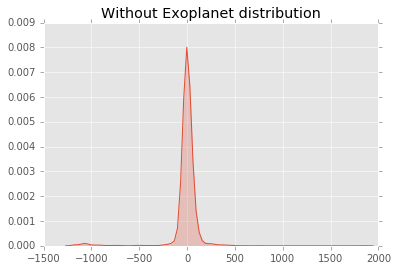

In [106]:
# KDE plot of a system without exoplanet
title = 'Without Exoplanet distribution'
data = x[yes_idx[np.random.randint(0, len(yes_idx))]]
kdeplot(title, data, 'without_exo')

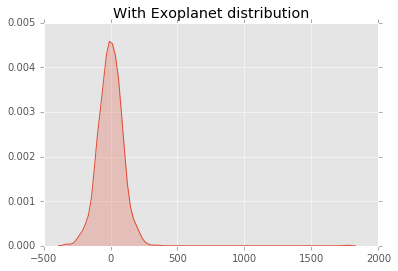

In [107]:
# KDE plot of a system with exoplanet
title = 'With Exoplanet distribution'
data = x[no_idx[np.random.randint(0, len(no_idx))]]
kdeplot(title, data, 'with_exo')

In [95]:
def normal_plot(title, data, name, label, format='svg'):
    np.save(os.path.join('plots', name), data)
    plt.xlim([-300, 3600])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.plot(data, label=label)
    plt.legend(loc='lower center', fancybox=True, shadow=True, bbox_to_anchor=(0.5, -0.05))
    plt.savefig(os.path.join('plots', name+'.{}'.format(format)), format=format)    

In [98]:
yes_sample = x[yes_idx[np.random.randint(0, len(yes_idx))]]
neg_sample = x[no_idx[np.random.randint(0, len(no_idx))]]

# Smoothen the data using Gaussian Filter
yes_sample_g = gaussian_filter(yes_sample, sigma=5)
neg_sample_g = gaussian_filter(neg_sample, sigma=5)

# Smoothen the data using Savitzky-Golay filter
yes_sample_s = savgol_filter(yes_sample, window_length=13, polyorder=3)
neg_sample_s = savgol_filter(neg_sample, window_length=13, polyorder=3)

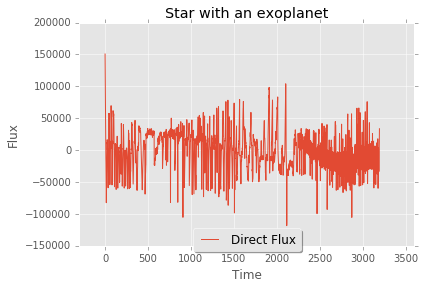

In [99]:
normal_plot('Star with an exoplanet', yes_sample, 'pos_sample', 'Direct Flux')

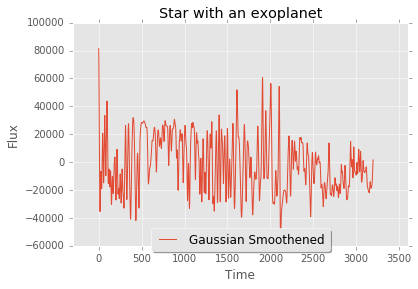

In [100]:
normal_plot('Star with an exoplanet', yes_sample_g, 'pos_sample_gaussian', 'Gaussian Smoothened')

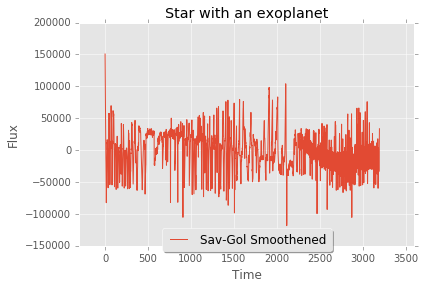

In [101]:
normal_plot('Star with an exoplanet', yes_sample, 'pos_sample_savgol', 'Sav-Gol Smoothened')

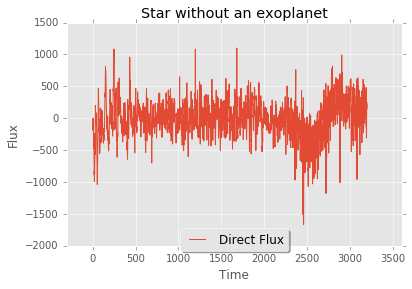

In [102]:
normal_plot('Star without an exoplanet', neg_sample, 'neg_sample', 'Direct Flux')

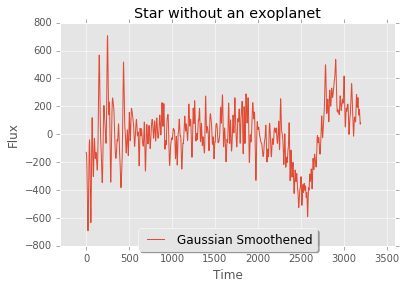

In [103]:
normal_plot('Star without an exoplanet', neg_sample_g, 'neg_sample_gaussian', 'Gaussian Smoothened')

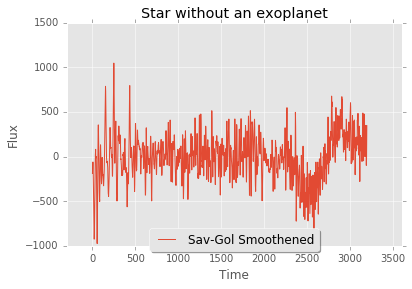

In [104]:
normal_plot('Star without an exoplanet', neg_sample_s, 'neg_sample_savgol', 'Sav-Gol Smoothened')